## Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

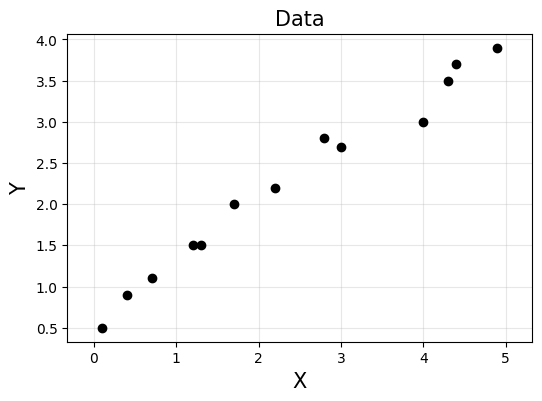

In [3]:
# data points in column vector [input, output]
train_x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
train_y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

m = train_x.shape[0]

plt.figure(figsize = (6, 4))
plt.plot(train_x, train_y, 'ko')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()


 optimal w = [[0.74257565]]

 optimal b = [[0.41717836]]


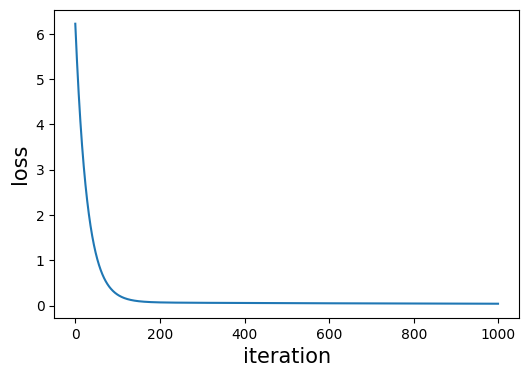

In [4]:
LR = 0.001
n_iter = 1000

w = tf.Variable([[0]], dtype = tf.float32)
b = tf.Variable([[0]], dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean(tf.square(w*train_x + b - train_y))
        w_grad, b_grad = tape.gradient(cost, [w,b])

    loss_record.append(cost)
    w.assign_sub(LR * w_grad)
    b.assign_sub(LR * b_grad)

w_val = w.numpy()
b_val = b.numpy()
print("\n optimal w =", w_val)
print("\n optimal b =", b_val)

plt.figure(figsize = (6, 4))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

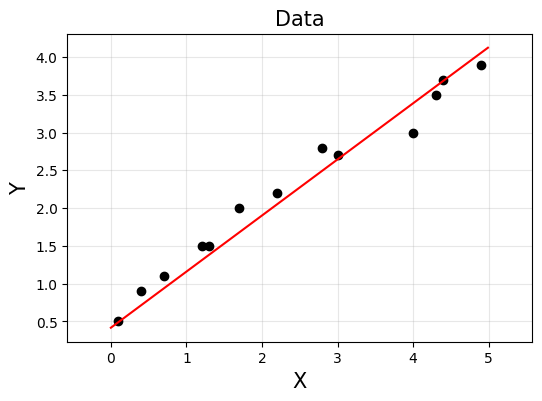

In [5]:
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w_val*xp + b_val

plt.figure(figsize = (6, 4))
plt.plot(train_x, train_y, 'ko')
plt.plot(xp, yp, 'r')
plt.title('Data', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

## Logistic Regression

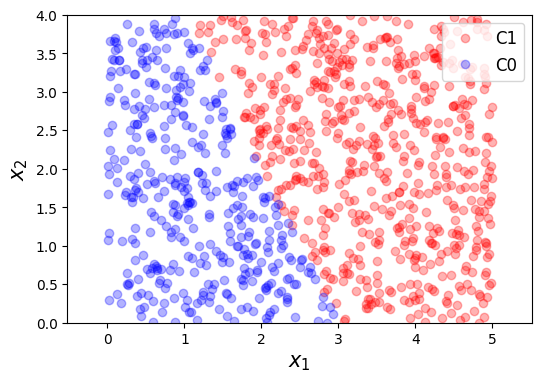

In [6]:
# datat generation

m = 1000
true_w = np.array([[-6], [2], [1]])
train_X = np.hstack([np.ones([m,1]), 5*np.random.rand(m,1), 4*np.random.rand(m,1)])

true_w = np.asmatrix(true_w)
train_X = np.asmatrix(train_X)

train_y = 1/(1 + np.exp(-train_X*true_w)) > 0.5

C1 = np.where(train_y == True)[0]
C0 = np.where(train_y == False)[0]

train_y = np.empty([m,1])
train_y[C1] = 1
train_y[C0] = 0

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

[[-4.048779  ]
 [ 1.7334017 ]
 [ 0.42894542]]


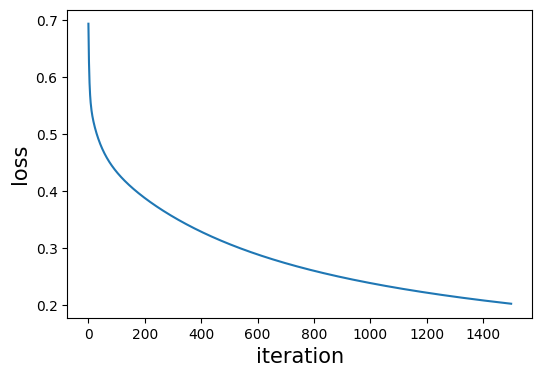

In [7]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype = tf.float32)
train_y = tf.constant(train_y, dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.sigmoid(tf.matmul(train_x, w))
        loss = - train_y*tf.math.log(y_pred) - (1-train_y)*tf.math.log(1-y_pred)
        loss = tf.reduce_mean(loss)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

plt.figure(figsize = (6, 4))
plt.plot(loss_record)
plt.xlabel('iteration', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.show()

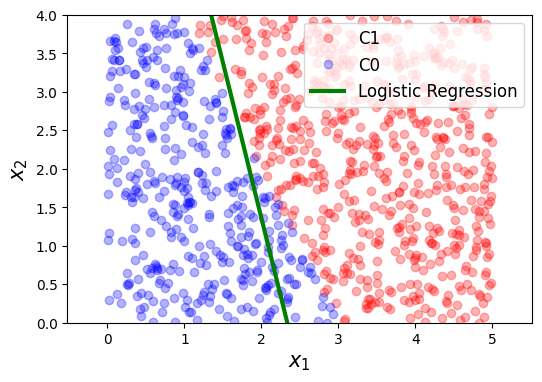

In [8]:
xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()

[[-141.99396 ]
 [  47.181892]
 [  23.627865]]


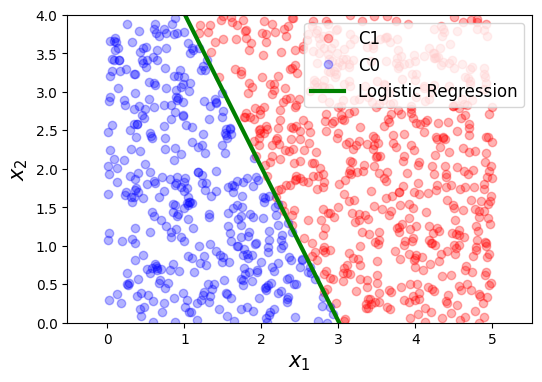

In [9]:
LR = 0.05
n_iter = 1500

w = tf.Variable([[0],[0],[0]], dtype = tf.float32)
train_x = tf.constant(train_X, dtype = tf.float32)
train_y = tf.constant(train_y, dtype = tf.float32)

loss_record = []
for i in range(n_iter):
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(train_x,w)
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = train_y, logits = y_pred)
        w_grad = tape.gradient(loss, w)

    loss_record.append(loss)
    w.assign_sub(LR * w_grad)

w_hat = w.numpy()
print(w_hat)

xp = np.arange(0, 4, 0.01).reshape(-1, 1)
yp = - w_hat[1,0]/w_hat[2,0]*xp - w_hat[0,0]/w_hat[2,0]

plt.figure(figsize = (6, 4))
plt.plot(train_X[C1,1], train_X[C1,2], 'ro', alpha = 0.3, label = 'C1')
plt.plot(train_X[C0,1], train_X[C0,2], 'bo', alpha = 0.3, label = 'C0')
plt.plot(xp, yp, 'g', linewidth = 3, label = 'Logistic Regression')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.ylim([0,4])
plt.show()